# Include your local folder containing necessary modules

In [1]:
import sys
sys.path.insert(0, r'C:\Users\Rayan El Helou\Documents\Projects\ML demos\PyTorch')

# Useful imports

In [2]:
# Standard tools
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from IPython import display
from tqdm import trange

# Custom tools
from neural_nets import torch_plot, BuildSequential

### Demonstrate GPU availability (or lack thereof)

In [3]:
print('cuda' if torch.cuda.is_available() else 'cpu','is available','\n')

if torch.cuda.is_available():
    torch.set_default_tensor_type('torch.cuda.FloatTensor')

x = torch.linspace(0, 2*np.pi, 1000)
print('x is on', x.device)

cuda is available 

x is on cuda:0


# Generate some training data

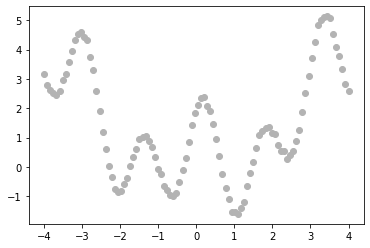

In [4]:
# Some x data
x = torch.linspace(-4, 4, 100)

# Adjust dimensions (make tall, since 1 column per input neuron)
x = x.reshape(-1, 1)

# Some y data ... uncomment whichever you want!
# y = torch.exp(-x**2)
# y = torch.exp(-2*(x + 2)**2) + torch.exp(-2*(x - 2)**2)
# y = torch.sin(2.5*x)
# y = (x**3 - 6*x)/10
y = torch.sin(4*x) + 2*torch.cos(x)*torch.cos(3*x) + x**2/4
# y = x

# Add some noise
y += 0.05*torch.randn_like(x)

gray = 0.7
torch_plot(x, y,'o',color=[gray, gray, gray])

# Build & Train a Neural Network in 2 lines of code

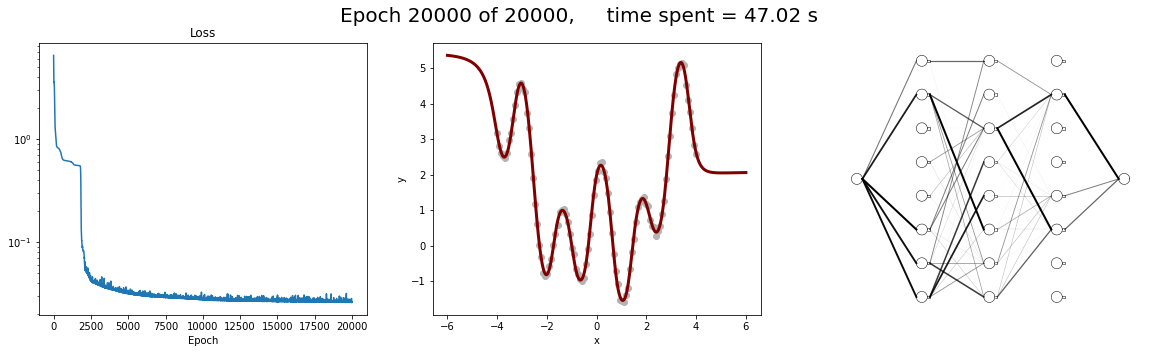

<Figure size 1440x360 with 0 Axes>

100%|███████████████████████████████████████████████████████████████████████████| 20001/20001 [00:47<00:00, 420.07it/s]


In [5]:
net = BuildSequential(1, 8, 8, 8, 1)

net.train(x, y, weight_penalty=0.01, plot_during=True, lr=0.01, N_epoch=20000)

### Memory occupied by neural network

In [6]:
net.print_memory_size()

0.8125 KB and 144 weights


# Observe outputs at hidden layers

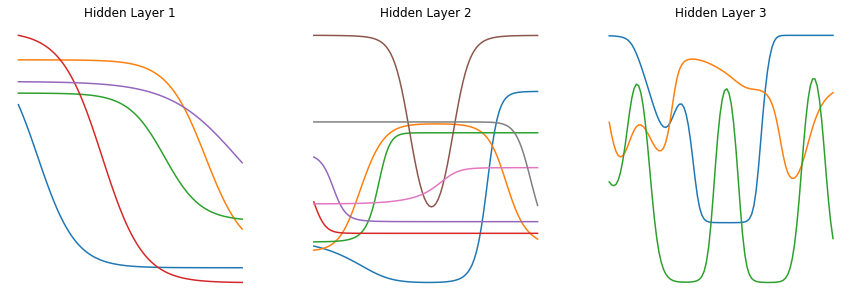

In [7]:
net.plot_hidden_output(x, tol = 0.1) # show neuron output only if max-min > tol

# Modify data & retrain
Network should adapt to modified data

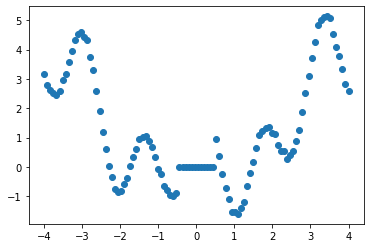

In [8]:
y_ = y*(torch.abs(x) > 0.5)

torch_plot(x, y_, 'o')

_Note: Loss plot below continues from where it left off_

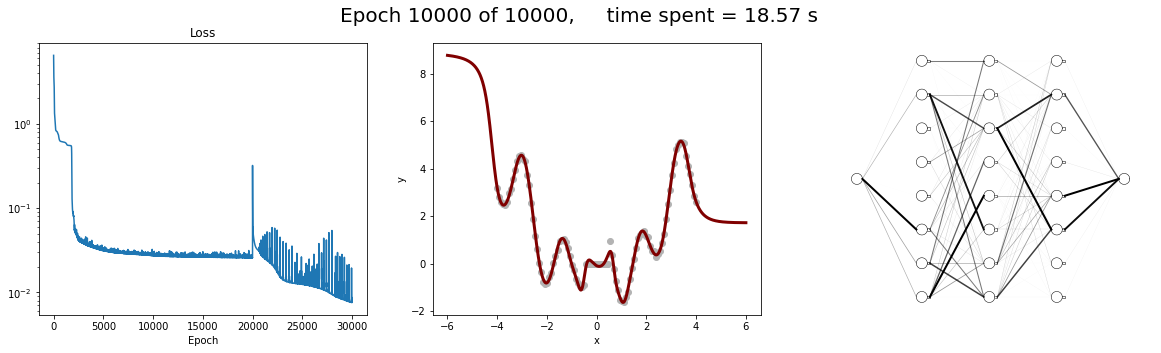

<Figure size 1440x360 with 0 Axes>

100%|███████████████████████████████████████████████████████████████████████████| 10001/10001 [00:18<00:00, 526.74it/s]


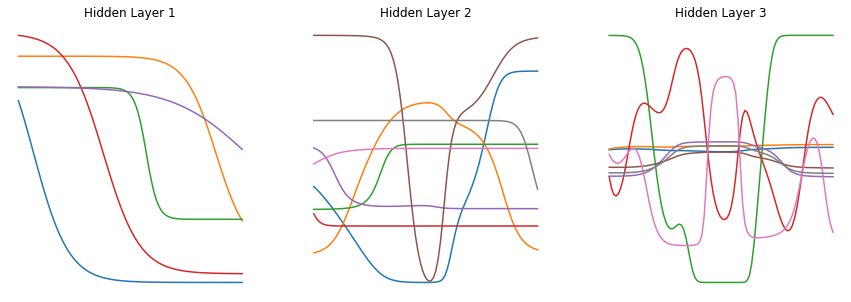

In [9]:
net.train(x, y_, N_epoch=10000)

net.plot_hidden_output(x, tol=0.1)

# CHALLENGE TO STUDENT

What we have shown above is an approach to solving a regression problem, where we assume that 1D points $y$ are related to 1D points $x$ in the form of $$ y_i = f(x_i)$$ and the neural network we built and trained estimates the function $f$.

Your challenge is:
1. Obtain a real/realistic dataset which contains several $(x,y)$ pairs ($x$ and $y$ refer to some meaningful measurement or feature) such that $y$ can be modelled as a function of $x$. The (possibly) challenging part is to find realistic things that are related to each other in this way, i.e. one is a function of the other. A trivial example is current through a resistor and voltage across it; either one can be expressed as a function of the other. Perhaps a less reasonable example is a person's age and their hour of birth (0 to 23).

2. Build and train a neural network that can estimate $y$ values for any $x$ value. To use the trivial resistor example from before, if $x$ is the current and $y$ is the voltage, then a single linear layer suffices.

Hint: use a dataset from your field of study.